In [8]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

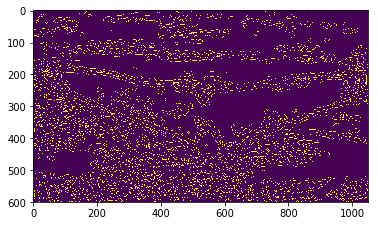

In [9]:
img = cv2.imread("0a0b2a01.jpg")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gradX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
gradY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)

            # subtract the y-gradient from the x-gradient
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
(_, thresh) = cv2.threshold(gradient, 100, 255, cv2.THRESH_BINARY)

thresh = cv2.dilate(thresh, None, iterations=1)
thresh = cv2.dilate(thresh, None, iterations=1)
thresh = cv2.erode(thresh, None, iterations=1)
thresh = cv2.erode(thresh, None, iterations=1)

image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE,
                                                          cv2.CHAIN_APPROX_SIMPLE)  # use cv2.RETR_TREE to locate and lock the tail
img = cv2.drawContours(img, contours, -1, (0, 255, 0), 5)
    
v = img.shape[0] # vertial pixels
h = img.shape[1] # horizontal pixels 
h_factor = 2

            #find edges with Canny algorism
canny_edges = cv2.Canny(img,300,300)
    
if v < h/h_factor:
    fill_length = int(abs(h/h_factor-v)*0.5)#np.random.rand()) # for upper filling
    
    fill = np.zeros(fill_length* h).reshape(fill_length, h) # black rectangle for upper filling

    canny_edges = np.r_[fill,canny_edges,fill] # fill with black rectangle
    img = np.r_[fill,img,fill] # fill with black rectangle
    
ver = int(h/h_factor)
cnt = []
for i in range(canny_edges.shape[0]-ver+2):
    cnt.append(canny_edges[i:i+ver,:].sum()/255)

cnt_arr = np.array(cnt)
i = cnt_arr.argmax()

canny_edges = cv2.Canny(img, 300, 300)
plt.imshow(canny_edges)